### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptarán consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)



# Tarea 2: Filtrado de señales

## Introducción


Un **electrocardiograma (ECG)** es un gráfico de voltaje (amplitud) en función del tiempo correspondiente a la actividad eléctrica del corazón. Cada etapa del ciclo cardíaco es representado por una letra: **P, Q, R, S y T**. La siguiente figura muestra un esquema de un ECG con dos pulsos.

<img src="cardio.png" width="600">


El ECG se usa para hacer diagnósticos y en particular para analizar la existencia de anormalidades en el ciclo cardiaco. La **frecuencia cardiaca**, es decir el inverso del intervalo RR, de un humano normal en reposo está en el rango de **60 y 100 latidos por minuto**



## Enunciado

El hospital base de Valdivia tiene un electrocardiógrafo que mide la ECG en miliVolts [mV] a una frecuencia de muestreo de $360$ [Hz]

Durante el proceso de captura ciertos errores provocaron que la señal se contamine con 

- **(A)** Un ruido asociado al sistema eléctrico
- **(B)** Un ruido de baja frecuencia causado por un desperfecto del sensor
- **(C)** Un ruido blanco de origen térmico 

Esto complica el análisis del médico por lo que el hospital base los contrata a ustedes para **diseñar un filtro que limpie la señal ECG**

Resuelva las actividades que se piden a continuación, respondiendo y analizando donde corresponda

<IPython.core.display.Javascript object>


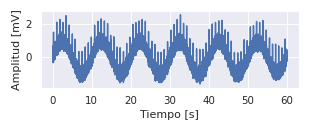

In [1]:
import numpy as np
import pickle
%matplotlib notebook
import matplotlib.pylab as plt
import seaborn as sns
import scipy.signal
import scipy.fft as sfft
sns.set()
with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)

Fs = 360
time = np.arange(len(data))/Fs
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

## 1. Análisis (15%)

- Observe los primeros dos segundos de la señal, compare con el esquema mostrado en la introducción y discuta sobre los efectos causados por los ruidos **A**, **B** y **C** mencionados en el enunciado. Además responda  ¿Qué es un ruido blanco y que tipo de efecto introduce en la señal y en su espectro? ¿Qué es una tendencia y que tipo de efecto introduce en la señal y su espectro? 
- Calcule y muestre gráficamente el valor absoluto de la transformada de Fourier de la señal en función de la frecuencia y su espectrograma en función del tiempo y la frecuencia. Para el espectrograma decida el largo de ventana, traslape y tipo de ventana. Justifique su elección tomando en consideración el rango de frecuencias de un paciente normal y los *trade-off* aprendidos en clases
- En base a la señal, su espectro de magnitud y su espectrograma identifique la frecuencia central o el rango de frecuencias asociada a las tres fuentes de ruido. ¿En qué rango de frecuencias (Hz) se espera encontrar la señal de ritmo cardíaco de un humano normal en reposo?


## 1.1 Respuestas

<IPython.core.display.Javascript object>


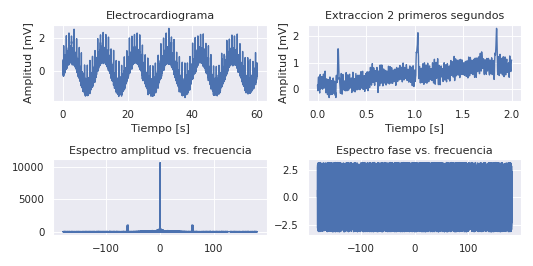

Text(0.5, 1.0, 'Espectro fase vs. frecuencia')

In [2]:
time1 = np.arange(len(data))/(Fs)
time2 = np.linspace(start=0,stop=2,num=720)
data2 = data[:720]
fig, axs = plt.subplots(2,2, figsize=(8,4), tight_layout=True)

axs[0,0].plot(time1, data)
axs[0,0].set_xlabel('Tiempo [s]')
axs[0,0].set_ylabel('Amplitud [mV]')
axs[0,0].set_title('Electrocardiograma')

axs[0,1].plot(time2, data2)
axs[0,1].set_xlabel('Tiempo [s]')
axs[0,1].set_ylabel('Amplitud [mV]')
axs[0,1].set_title('Extraccion 2 primeros segundos')


s = sfft.fft(data, len(data))
SA = np.absolute(s)
SP = np.angle(s)
freqs = sfft.fftfreq(len(data), 1/Fs)
axs[1,0].set_title("Espectro amplitud vs. frecuencia")
axs[1,0].plot(sfft.fftshift(freqs),sfft.fftshift(SA))

axs[1,1].plot(freqs, SP)
axs[1,1].set_title("Espectro fase vs. frecuencia")

                
El electrocardiograma estudia la frecuencia cardiaca de un paciente. De este sabemos que debe entregar una suerte de gráfico con pulsaciones, sin embargo, la señal presenta tres clases de ruido: A, B y C, lo cual dificultan su lectura.    

A simple vista, el electrocardiograma muestra ciertos picos que sobresalen del gráfico, estos representan las pulsaciones del paciente.

En primera instancia, vemos que el electrocardiograma presenta una naturaleza sinusoidal, esto se debe a un desperfecto en el sensor del electrocardiógrafo. Este ruido se caracteriza por ser de baja frecuencia y se puede visualizar en el gráfico 'Espectro de amplitud vs frecuencia' en las frecuencias -0.1 y 0.1 Hz.

Por otro lado, el gráfico que contempla las muestras obtenidas en los tiempos [0,2] segundos permite visualizar dos tipos de ruidos, estos son ruido blanco de origen térmico y un ruido asociado al eléctrico. Del ruido asociado al sistema eléctrico sabemos que se presenta en los 60 Hz, y podemos comprobar su existencia en el gráfico 'Espectro de amplitud vs frecuencia', cuando visualizamos las frecuencias -60 y 60 Hz. A su vez, el ruido blanco está presente como piso en el mismo gráfico, tomando lugar en todas las frecuencias de la muestra y caracterizandose por su baja amplitud. 

El gráfico 'Espectro de fase vs. frecuencia' reafirma nuestra teoría, la señal presenta bastante ruido. 

**¿Qué es un ruido blanco? ¿Qué tipo de efecto introduce en la señal y en su espectro?**

Es un tipo de ruido que se genera producto de un proceso estocástico, es decir, de manera aleatoria. Se caracteriza porque no existe correlación en sus valores con sus instantes pasados. Además, todas sus frecuencias tienen la misma amplitud, lo que se conoce como una densidad espectral de potencia constante. En una señal este ruido produce una perturbación sin una tendencia definida. En cuanto al espectro de la señal el ruido persiste y dependiendo de su intensidad puede llegar a contaminar por completo lo que se desea estudiar.
    
**¿Qué es una tendencia?¿Qué tipo de efecto introduce en la señal y su espectro?**

En el contexto de lo estudiado se podría describir como una corriente o inclinación que modifica una señal de manera determinista, pudiendo prever su comportamiento en el tiempo, donde existe una correlación. Además, una tendecia puede provocar cambios en una señal y por ende en su espectro, pero no una forma errática como en el caso del ruido blanco.

<IPython.core.display.Javascript object>


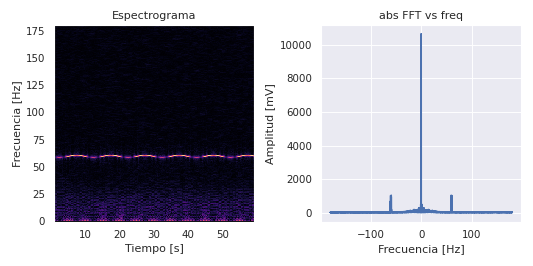

Text(0, 0.5, 'Amplitud [mV]')

In [3]:
fig, (ax5, ax6) = plt.subplots(1,2, figsize=(8,4), tight_layout= True)

Nw = 540

# hay que definir las especificaciones adecuadas para un espectrograma de calidad
f,t, Sxx = scipy.signal.spectrogram(data, #señal 
                                    Fs, #frecuencia muestreo
                                    window=('kaiser', 0), # tipo ventana
                                    nperseg=Nw, #largo de ventana
                                    noverlap=539, #cantidad de traslape
                                    #detrend=False,
                                    #return_onesided=True,
                                    #scaling='density',
                                    mode='magnitude',
                                    )


ax5.pcolormesh(t, f, Sxx, cmap=plt.cm.magma, shading= 'auto')
ax5.set_title('Espectrograma')
ax5.set_xlabel('Tiempo [s]')
ax5.set_ylabel('Frecuencia [Hz]')


ax6.plot(freqs, SA)
ax6.set_title('abs FFT vs freq')
ax6.set_xlabel('Frecuencia [Hz]')
ax6.set_ylabel('Amplitud [mV]')

Sabemos que existen muchas ventanas y que cada una representa un compromiso o trade-off, sin embargo y acorde al problema, pensamos que una ventana abrupta, esto porque idealmente queremos salvaguardar la pulsación y las componentes que lo rodean. Puntualmente estamos sacrificando resolución.
    
Para el espectrograma empleamos la ventana Kaiser, con beta igual a 0, esto hace que su comportamiento sea similar a la ventana rectangular y nos permite visualizar fácilmente las pulsaciones del paciente. Además usamos un largo equivalente a 540 y un traslape igual a 539 para obtener una buena resolución, aunque realizando un cálculo computacional bastante alto.


Como mencionamos anteriormente, el espectro de amplitud presenta cuatro componentes diferenciables, aunque para ser precisos realmente son dos, ya que unas son el reflejo de las otra. Primero vemos una componente en las frecuencias -0.1 y 0.1 Hz, estas componentes están relacionadas con el desperfecto del sensor del electrocardiógrafo. Luego vemos otras componentes en las frecuencias -60 y 60 Hz que representan el ruido del sistema eléctrico. Finalmente, podemos ver el piso que representa al ruido blanco.

La frecuencia cardíaca de un persona normal debería encontrarse en el rango [1-1,66]Hz]

## 2. Filtrado FIR (50%)

Describa lo que es un filtro FIR, explique paso a paso el método de enventanado y describa los argumentos y el valor de retorno de la función `scipy.signal.firwin`. 

Luego use este método para diseñar y aplicar tres filtros sobre la señal de entrada. El primero debe filtrar el ruido **(A)**, el segundo el ruido **(B)** y el tercero el ruido **(C)**. Indique la(s) frecuencia(s) de corte y el tipo de filtro en cada caso. Justifique su elección en base a sus observaciones en el paso anterior.

Considere una ventana de Hamming y $1001$ coeficientes para el filtro

Por cada filtro:
- Muestre la respuesta al impulso y la respuesta en frecuencia resultantes
- Filtre la señal convolucionando con la respuesta al impulso
- Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso? Luego muestre gráficamente el espectro de magnitud y el espectrograma de la señal restada. En base a lo que observa y a los gráficos del punto anterior discuta sobre la efectividad del filtro

Finalmente
- Filtre la señal convolucionando con los tres filtros. Muestre el resultado graficamente. 
- Muestre un acercamiento de los primeros tres segundos de la señal filtrada, reconozca la fase R y márquela con una linea roja punteada.
- Cree una función que mida el tiempo RR en la señal filtrada. Grafique la frecuencia cardiaca en función del tiempo. ¿Se encuentra la persona en el rango sano o no?

## 2.1 Respuestas

El filtro FIR es un tipo de filtro digital, su nombre proviene del acrónimo FIR que significa _respuesta finita al impulso_. Su utilidad yace en que obtienen una salida a partir de entradas actuales y anteriores. Sus características más notables son:
 - Pueden diseñarse con una fase perfectamente lineal
 - Son filtros no recursivos, es decir, que la salida en un instante dado no depende de instantes anteriores.
 - Son siempre estables al no tener realimentaciones.
 - Su respuesta al impulso coincide con el valor de sus coeficientes.

El método de enventanado es una de las técnicas para el diseño de filtros FIR. Se puede describir en los siguientes pasos.

- Se diseña una plantilla en el dominio de la frecuencia con las cararactisticas que se desean para el filtro. Por ejemplo definir la frecuencia de corte.

- Una vez diseñada esta plantilla, se muestrea para luego calcular su transformada de Fourier discreta.

- Luego, se calcula la transformada de Fourier inversa para así obtener la respuesta a impulso.

- Finalmente, se toma una fracción de la respuesta (truncamiento) a impulso obtenido usando una ventana.


La función **scipy.signal.firwin** calcula y retorna los coeficientes de un filtro de respuesta al impulso finito mediante el metodo de enventanado.     
[Ver documentación oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html).

Sus parámetros de entrada son los siguentes (_campos obligatorios_ <font color='red'>*</font> ):

   - **numtaps** <font color='red'>*</font> (int): Corresponde al número de coeficientes que tendrá el filtro.
   - **cutoff** <font color='red'>*</font>(float o ndarray): Es la frecuencia de corte del filtro, puede ser un solo valor en caso de tratarse de un filtro pasa-bajo o pasa-alto, o puede ser un arreglo de frecuencias de corte en el caso de un filtro pasa-banda o rechaza-banda.
   - **width** (float): Si el argumento es distinto a None, corresponde al ancho aproximado de la región de transición para usar en un diseño de filtro FIR tipo Kaiser.
   - **window** (string): Aquí se espicifica el tipo de ventana que se usará en el filtro.
   - **pass_zero**{True,False,'bandpass', 'lowpass', 'highpass', 'bandstop'}: Se establece si se desea o no dejar pasar la frecuencia cero.
   - **scale**(bool): Si el valor es True se escalarán los coeficientes de forma que la respuesta de frecuencia es unitaria en una frecuencia dada.
   - **nyq** (float): Este argumento se considera obsoleto y en su reemplazo se usa 'fs'. Corresponde a la frecuencia de Nyquist. Cada frecuencia de corte en 'cutoff' debe estar entre 0 y 'nyq'. El valor por defecto es 1.
   - **fs** (float): Es la frecuencia de muestreo de la señal. Cada frecuencia de corte en 'cutoff' debe estar entre 0 y fs/2. El valor por defecto es 2.
   
Valor de retorno: 

   - **h** (ndarray): Arreglo de largo numtaps de los coeficientes del filtro FIR.
   
**Filtrado FIR de la señal**

In [4]:
# Datos generales
window = 'hamming'
L = 1001
t = np.arange(-L//2, L//2, step=1)/Fs

**1. Filtrado ruido (A)**

Dado que el ruido asociado al sistema eléctrico (A) tiene un rango de frecuencias considaradas altas(50-60Hz) en comparación a las frecuencias de interés que están bajo los 2Hz, sería lógico diseñar un filtro pasa-bajo con una frecuencia de corte de unos 50Hz, de esa forma al convulsionar con la señal podemos recuperar todas las frecuencias menores a 50Hz y en efecto, eliminar el ruido (A) de la señal.

<IPython.core.display.Javascript object>


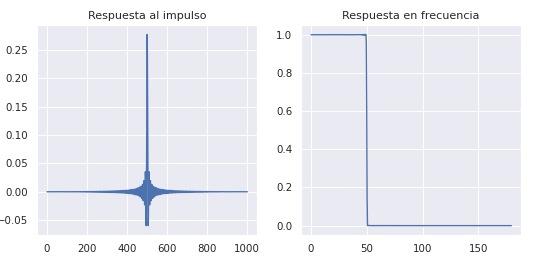

Text(0.5, 1.0, 'Respuesta en frecuencia')

In [5]:
# Filtrado ruido A
#Filtro pasa-bajo

fc = 50
h = scipy.signal.firwin(numtaps=L, cutoff=fc, window=window, pass_zero=True,fs=360)
y = np.convolve(data, h, mode='same')
freq, H = scipy.signal.freqz(h, fs=Fs)
fig, (ax7, ax8) = plt.subplots(1,2, figsize=(8,4), tight_layout=True)

ax7.plot(h)
ax7.set_title('Respuesta al impulso')

ax8.plot(freq, np.absolute(H))
ax8.set_title('Respuesta en frecuencia')

Al restar la señal original con una señal convulsionada con uno de los filtros obtenemos la parte de la señal que dicho filtro eliminó o mejor dicho obtenemos la señal del ruido.

<IPython.core.display.Javascript object>


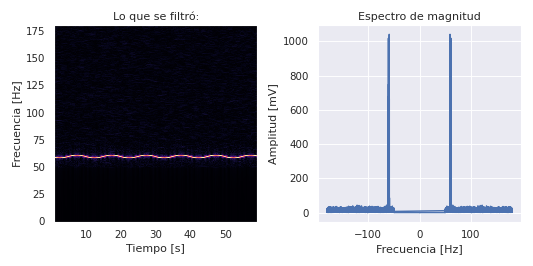

Text(0, 0.5, 'Amplitud [mV]')

In [6]:
# Resta entre la señal original y la señal filtrada.
r = data - y
S = sfft.fft(r,len(r))
SA = np.absolute(S)
freqs = sfft.fftfreq(len(S),1/Fs)

fig, (ax9, ax10) = plt.subplots(1,2, figsize=(8,4), tight_layout= True)
Nw = 540

# hay que definir las especificaciones adecuadas para un espectrograma de calidad
f,t, Sxx = scipy.signal.spectrogram(r, #señal 
                                    Fs, #frecuencia muestreo
                                    window=('kaiser', 0), # tipo ventana
                                    nperseg=Nw, #largo de ventana
                                    noverlap=Nw//1.01, #cantidad de traslape
                                    #detrend=False,
                                    #return_onesided=True,
                                    #scaling='density',
                                    mode='magnitude',
                                    )

ax9.pcolormesh(t, f, Sxx, cmap=plt.cm.magma, shading= 'auto')
ax9.set_title('Lo que se filtró:')
ax9.set_xlabel('Tiempo [s]')
ax9.set_ylabel('Frecuencia [Hz]')


ax10.plot(freqs, SA)
ax10.set_title('Espectro de magnitud')
ax10.set_xlabel('Frecuencia [Hz]')
ax10.set_ylabel('Amplitud [mV]')

Se puede observar tento en el espectrograma como en el espectro de amplitud que la señal obtenida por la resta que el rango de frecuencias que prima se encuentra alrededor de los 60Hz, lo que coincide con la frecuencia de ruido (A) que se pretendía eliminar proveniente del sistema eléctrico. Por lo tanto se puede concluir que esta fase de filtrado fue exitosa.

**2. Filtrado ruido (B)**

Sabemos que este ruido tiene muy baja frecuencia y como se puede ver en el gráfico de la señal es probable que este ruido sea el responsable del comportamiento sinusoidal que tiene la señal. Como también sabemos las frecuencias de interés que queremos recuperar estarían en el rango [1-2]Hz aproximadamente. Por lo tanto, se propone un filtro pasa-alto con una frecuencia de corte de 1Hz. De esta forma eliminamos todo el rango de frecuencias inferior a nuestro rango de interés.

<IPython.core.display.Javascript object>


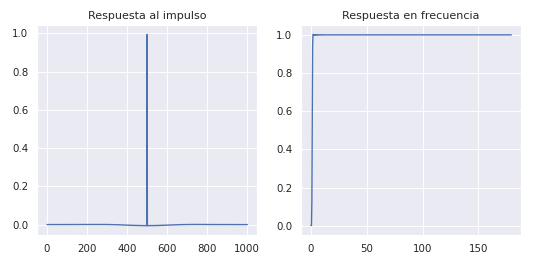

Text(0.5, 1.0, 'Respuesta en frecuencia')

In [7]:
# Filtrado ruido B
#Filtro pasa-alto
fc = 1
h1 = scipy.signal.firwin(numtaps=L, cutoff=fc, window=window, pass_zero=False, fs=Fs)
y1 = np.convolve(data, h1, mode='same')

freq1, H1 = scipy.signal.freqz(h1, fs=Fs)
fig, (ax11, ax12) = plt.subplots(1,2, figsize=(8,4), tight_layout=True)

ax11.plot(h1)
ax11.set_title('Respuesta al impulso')

ax12.plot(freq1, np.absolute(H1))
ax12.set_title('Respuesta en frecuencia')

<IPython.core.display.Javascript object>


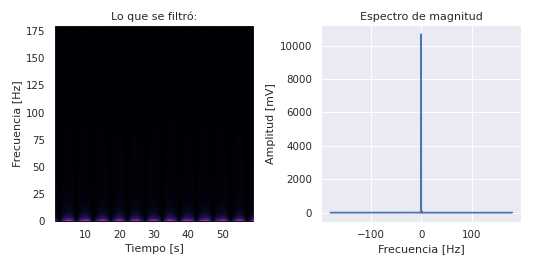

Text(0, 0.5, 'Amplitud [mV]')

In [8]:
# Resta entre la señal original y la señal filtrada.
r1 = data - y1
S = sfft.fft(r1,len(r1))
SA = np.absolute(S)
freqs = sfft.fftfreq(len(S),1/Fs)

fig, (ax13, ax14) = plt.subplots(1,2, figsize=(8,4), tight_layout= True)
Nw = 540

# hay que definir las especificaciones adecuadas para un espectrograma de calidad
f,t, Sxx = scipy.signal.spectrogram(r1, #señal 
                                    Fs, #frecuencia muestreo
                                    window=('kaiser', 0), # tipo ventana
                                    nperseg=Nw, #largo de ventana
                                    noverlap=Nw//1.01, #cantidad de traslape
                                    #detrend=False,
                                    #return_onesided=True,
                                    #scaling='density',
                                    mode='magnitude',
                                    )

ax13.pcolormesh(t, f, Sxx, cmap=plt.cm.magma, shading= 'auto')
ax13.set_title('Lo que se filtró:')
ax13.set_xlabel('Tiempo [s]')
ax13.set_ylabel('Frecuencia [Hz]')


ax14.plot(freqs, SA)
ax14.set_title('Espectro de magnitud')
ax14.set_xlabel('Frecuencia [Hz]')
ax14.set_ylabel('Amplitud [mV]')

Como se puede observar en el espectrograma y el espectro de magnitud, la señal de ruido que filtramos presenta un rango de frecuencias muy cercanas a cero, además de una amplitud bastante alta, por lo que es muy probable que el ruido filtrado sea el responsable del comportamiento sinusoidal de la señal. En conclusión se podría decir que la segunda fase de filtrado funcinó como se esperaba. 

**3. Filtrado ruido (C)**

Con la información que tenemos acerca de este ruido podemos prever que estará presente es todo el espectro de frecuecias de la señal dada su naturaleza de ruido blanco. Podemos proponer un filtro pasa-banda con un rango de frecuencias de corte que busque contener nuestras frecuencias de interés. De esa forma eliminar la mayor cantidad de ruido blanco posible. 

<IPython.core.display.Javascript object>


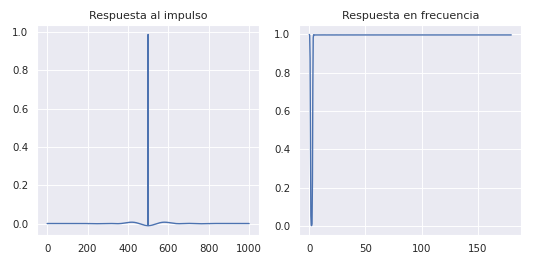

Text(0.5, 1.0, 'Respuesta en frecuencia')

In [9]:
# Filtrado ruido C
#Filtro pasa-banda
fc = [1,3]
h2 = scipy.signal.firwin(numtaps=L, cutoff=fc, window=window, pass_zero='bandstop', fs=360)
y2 = np.convolve(data, h2, mode='same')

freq2, H2 = scipy.signal.freqz(h2, fs=Fs)
fig, (ax15, ax16) = plt.subplots(1,2, figsize=(8,4), tight_layout=True)

ax15.plot(h2)
ax15.set_title('Respuesta al impulso')

ax16.plot(freq2, np.absolute(H2))
ax16.set_title('Respuesta en frecuencia')


<IPython.core.display.Javascript object>


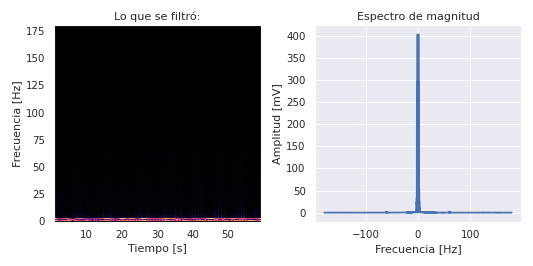

Text(0, 0.5, 'Amplitud [mV]')

In [10]:
# Resta entre la señal original y la señal filtrada.
r2 = data - y2
S = sfft.fft(r2,len(r2))
SA = np.absolute(S)
freqs = sfft.fftfreq(len(S),1/Fs)

fig, (ax17, ax18) = plt.subplots(1,2, figsize=(8,4), tight_layout= True)
Nw = 540

# hay que definir las especificaciones adecuadas para un espectrograma de calidad
f,t, Sxx = scipy.signal.spectrogram(r2, #señal 
                                    Fs, #frecuencia muestreo
                                    window=('kaiser', 0), # tipo ventana
                                    nperseg=Nw, #largo de ventana
                                    noverlap=Nw//1.01, #cantidad de traslape
                                    #detrend=False,
                                    #return_onesided=True,
                                    #scaling='density',
                                    mode='magnitude',
                                    )

ax17.pcolormesh(t, f, Sxx, cmap=plt.cm.magma, shading= 'auto')
ax17.set_title('Lo que se filtró:')
ax17.set_xlabel('Tiempo [s]')
ax17.set_ylabel('Frecuencia [Hz]')


ax18.plot(freqs, SA)
ax18.set_title('Espectro de magnitud')
ax18.set_xlabel('Frecuencia [Hz]')
ax18.set_ylabel('Amplitud [mV]')

Como puede observarse en el espectrograma y el espectro de magnitud, el rango de frecuencias resultante luego del filtrado son muy bajas, según el rango de corte definido deberían encontrarse entre [1-3]Hz. Sin embargo es muy probable que aún persista algo de ruido blanco en la señal.

**Convolución de los tres filtros y la señal**

<IPython.core.display.Javascript object>


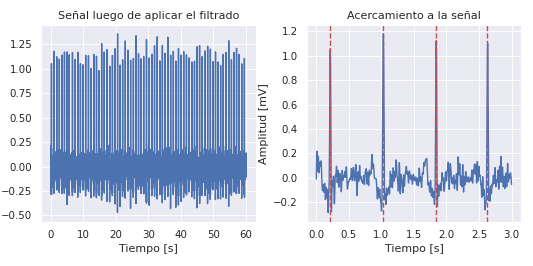

Text(0, 0.5, 'Amplitud [mV]')

In [11]:
# Convolucion con los 3 filtros
yf = np.convolve(h, h1, mode='same')
yf = np.convolve(yf, h2, mode='same')
yf = np.convolve(yf, data, mode='same')

fig, (ax19, ax20) = plt.subplots(1,2, figsize=(8,4), tight_layout= True)

ax19.plot(time1, yf)
ax19.set_title("Señal luego de aplicar el filtrado")
ax19.set_xlabel('Tiempo [s]')
ax19.set_ylabel('Amplitud [mV]')

time2 = np.linspace(start=0,stop=3,num=1080)
yf1 = yf[:1080]
ax20.plot(time2,yf1)
ax20.set_title('Acercamiento a la señal')
ax20.axvline(0.21, c='r', ls='--')
ax20.axvline(1.03, c='r', ls='--')
ax20.axvline(1.84, c='r', ls='--')
ax20.axvline(2.63, c='r', ls='--')
# Indican las pulsaciones en el gráfico

ax20.set_xlabel('Tiempo [s]')
ax20.set_ylabel('Amplitud [mV]')

Observando los gráficos se puede notar que los ruidos (A) y (B) fueron practicamente eliminados de la señal durante el proceso de filtrado. Sin embargo, el ruido blanco de origen térmico (C) persiste en la señal y no se puedo eliminar por completo como era de esperarse.

**Medición del tiempo del ciclo RR en la señal**

La siguiente función calcula el tiempo transcurrido o periodo entre cada ciclo RR observado en la señal, luego trasforma este periodo en frecuencias y retorna una lista con todo el conjunto de frecuencias cardíacas.

In [12]:
def RR_time(s):
    k = 0;
    j = 0;
    fs = 360
    frec = []
    for i in range(1,len(s)):
        if(s[i] > s[i-1] and s[i] > s[i+1] and s[i] > 0.7):
            frec.append(i)
            j = j + 1
    for i in range(1,len(frec)):
        # Periodo ciclo RR
        frec[i-1] = (frec[i] - frec[i-1]) / fs
        # Calculo de frecuencia
        frec[i-1] = 1 / frec[i-1]
    frec.pop()    
    return frec 


**Frecuencia cardíaca del paciente a lo largo del tiempo**

<IPython.core.display.Javascript object>


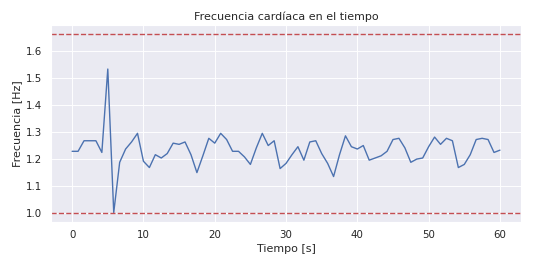

In [13]:
fig, ax21 = plt.subplots(1, figsize=(8,4), tight_layout=True)

t = np.linspace(start = 0, stop= 60, num = 73)
card = RR_time(yf)
ax21.plot(t,card)
ax21.set_xlabel('Tiempo [s]')
ax21.set_ylabel('Frecuencia [Hz]')
ax21.set_title('Frecuencia cardíaca en el tiempo')
ax21.axhline(1.66, c='r', ls='--')
ax21.axhline(1, c='r', ls='--')




Las líneas segmentadas rojas representan el rango normal de la frecuencia cardíaca de una persona normal en reposo. Según se observa en el gráfico, la persona estudiada está dentro de este rango por lo que se puede considerar que se encuentra en el rango sano.

## 3. Filtrado IIR (35%)

Describa los filtros IIR y compárelo con los filtros FIR. Describa los argumentos y el valor de retorno de la función `scipy.signal.iirfilter`.

Luego use este método para diseñar tres filtros. Los filtros deben cumplir el mismo propósito que en el caso anterior. Considere filtros IIR de tipo `butterworth` y todos del mismo orden. Aplique los filtros sobre la señal de entrada usando la función `scipy.signal.lfilter`.

El objetivo es encontrar el mínimo orden para los filtros IIR tal que el error medio cuadrático entre la señal filtrada IIR y la señal filtrada FIR sea menor que un 1% de la varianza de la señal filtrada FIR. Es decir que si $x$ es la señal filtrada IIR e $y$ es la señal filtrada FIR donde $N = \min(\text{len}(x), \text{len}(y))$ se cumpla que

$$
\sum_{i=1}^N (x_i - y_i)^2 < 0.01 \sum_{i=1}^N (y_i - \bar y_i)^2
$$

Finalmente, discuta sobre sus hallazgos muestre gráficamente el resultado del mejor filtro IIR


## 3.1 Respuestas

Los filtro IIR son un tipo de filtros digitales al igual que los de tipo FIR cuyo nombre significa de respuesta al impulso infinita. Al contrario de los filtros FIR, estos son recursivos, es decir, la salida en un instante de tiempo dado de un filtro IIR depende tanto de las entradas actuales y pasadas como de las salidas en instantes anteriores. Por lo tanto, su respuesta al impulso se debe calcular recursivamente y en general en infinita.


La función scipy.signal.iirfilter diseña filtros IIR tanto digitales como analógicos dado el orden y puntos críticos. [Ver documentación oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html)

Sus parámetros de entrada son los siguentes (_campos obligatorios_ <font color='red'>*</font> ):

- **N** <font color='red'>*</font>(int): Orden del filtro.
- **Wn**<font color='red'>*</font>(array_like): Secuencia de valores dando las frecuencias críticas. Para filtros digitales, 'Wn' está las mismas unidades que la frecuencia de muestreo 'fs'. En el caso de filtro analógicos, 'Wn' es una frecuencia angular.
- **rp** (float): Para filtros Chebyshev y elípticos proporciona la perturbación máxima en el pasa-banda.
- **rs** (float): Para filtros Chebyshev y elípticos proporciona la atenuación mínima en el rechaza-banda.
- **btype** {‘bandpass’, ‘lowpass’, ‘highpass’, ‘bandstop’}: Aquí se especifica el  tipo de filtro que se usará. El valor por defecto es 'bandpass' (pasa-banda)
- **analog** (bool): Si se establece como 'true', se retorna un filtro será análogico, de otra forma se retorna un filtro digital.
- **ftype** (string): Se establece el tipo de filtro IIR a diseñar. Puede tomar valores como: 'butter'(Butterworth), 'cheby1'(Chebyshev I), 'cheby2'(Chebyshev II), 'ellip'(Cauer/elíptico) o 'bessel'(Bessel/Thompson).
- **output** {‘ba’, ‘zpk’, ‘sos’}: Se especifica el tipo de salida que se desea.
- **fs** (float): La frecuencia de muestreo del sistema digital.

Valor de retorno:

- **b, a** (ndarray, ndarray): Numerador(b) y denominador(a) polinomiales del filtro IIR. Solo se retorna si output='ba'.

- **z, p, k** (ndarray, ndarray, float): Ceros(z), polos(p) y ganancia del sistema(k) de la función de transferencia del filtro IIR. Solo se retorna si output='zpk'.

- **sos** (ndarray): Representación de las secciones de segundo orden del filtro IIR. Solo se retorna si output='sos'.




**Filtrado IIR de la señal**

**1. Filtrado ruido (A)**

In [14]:
fc = 50
b, a = scipy.signal.iirfilter(N=3, Wn=fc, fs=Fs, ftype='butter', btype='lowpass')
p = scipy.signal.lfilter(b, a, data)

<IPython.core.display.Javascript object>


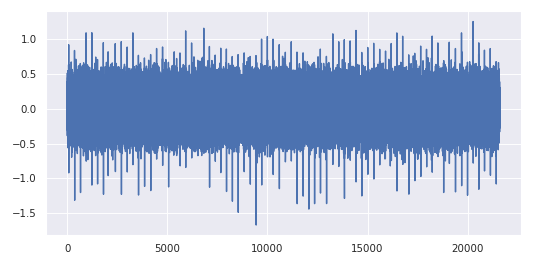

In [15]:
fig, ax22 = plt.subplots(1, figsize=(8,4), tight_layout=True)
p = data - p
ax22.plot(p)

**2. Filtrado ruido (B)**

<IPython.core.display.Javascript object>


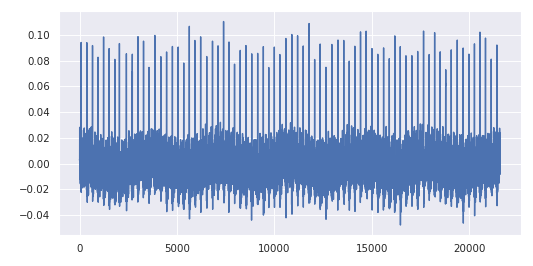

In [16]:
fc = 1
b1, a1 = scipy.signal.iirfilter(N=3, Wn=fc, fs=Fs, ftype='butter', btype='highpass')
p1 = scipy.signal.lfilter(b1, a1, p)
fig, ax23 = plt.subplots(1, figsize=(8,4), tight_layout=True)
p1 = p - p1
ax23.plot(p1)

**3. Filtrado ruido (C)**

<IPython.core.display.Javascript object>


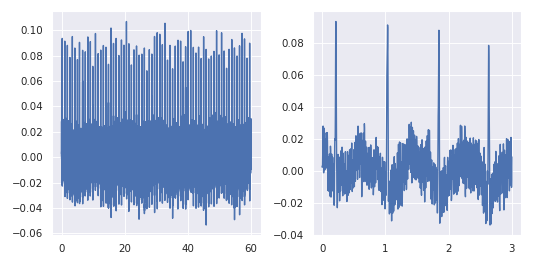

In [17]:
b2,a2 = scipy.signal.iirfilter(N=3, fs = Fs, Wn=[1, 1.66], ftype='butter', btype='bandpass')
p2 = scipy.signal.lfilter(b2,a2,abs(p1))
fig, (ax24, ax25) = plt.subplots(1,2, figsize=(8,4), tight_layout=True)
p2 = p1 - p2
ax24.plot(time1, p2)
ax25.plot(time2, p2[:1080])

In [20]:
# Se cumple para orden IIR = 3


for i in range(0, 4):
    
    b, a = scipy.signal.iirfilter(N=i, Wn=fc, fs=Fs, ftype='butter', btype='lowpass')
    p = scipy.signal.lfilter(b, a, data)
    p = data - p
    fc = 1
    b1, a1 = scipy.signal.iirfilter(N=i, Wn=fc, fs=Fs, ftype='butter', btype='highpass')
    p1 = scipy.signal.lfilter(b1, a1, p)
    p1 = p - p1
    b2,a2 = scipy.signal.iirfilter(N=i, fs = Fs, Wn=[1, 1.66], ftype='butter', btype='bandpass')
    p2 = scipy.signal.lfilter(b2,a2,abs(p1))
    p2 = p1 - p2
    if (np.mean(p2) < np.var(yf)* 0.1) : print('Se cumple para orden '+ str(i)+ '!')


Se cumple para orden 0!
Se cumple para orden 1!
Se cumple para orden 2!
Se cumple para orden 3!
